l1 regulizer

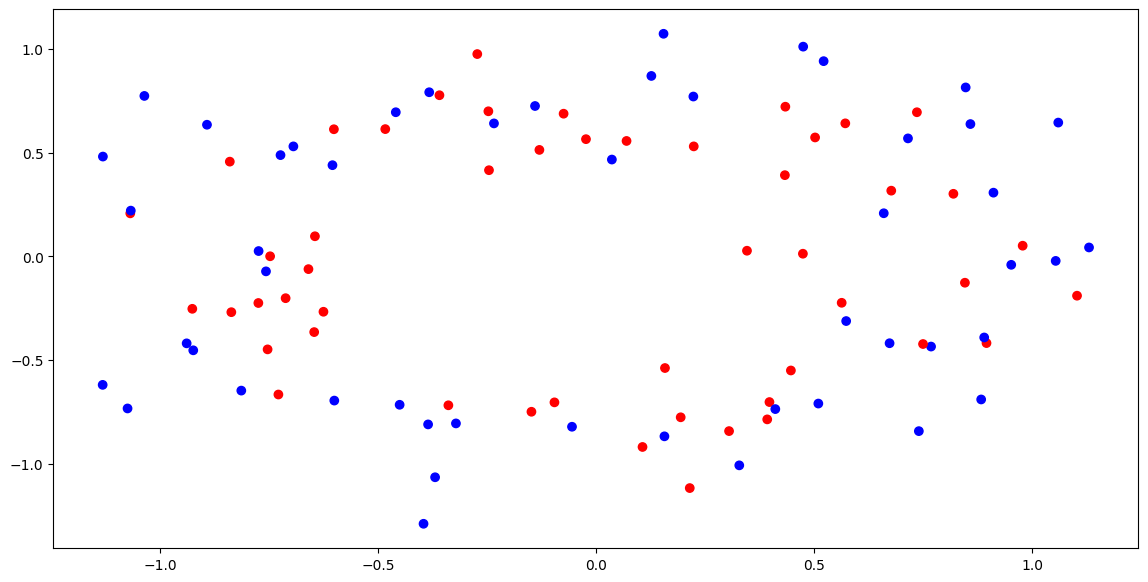

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


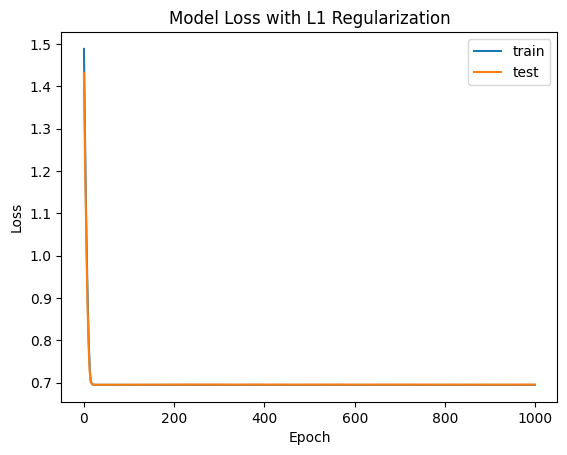

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Generate synthetic dataset
np.random.seed(800)
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# Custom color map for the plot
zero_one_colourmap = ListedColormap(('blue', 'red'))

# Plot the data
plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=zero_one_colourmap)
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Regularization imports
from tensorflow.keras import regularizers

### L1 Regularization Model ###
l1_model = tf.keras.models.Sequential()
l1_model.add(tf.keras.layers.Dense(500, input_dim=2, activation='relu',
                                   kernel_regularizer=regularizers.l1(0.01)))  # L1 regularization
l1_model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01)))

# Compile the model
l1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
l1_history = l1_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(X_test, y_test))

# Plot the loss over epochs for the L1 regularized model
plt.plot(l1_history.history['loss'], label="train")
plt.plot(l1_history.history['val_loss'], label="test")
plt.title('Model Loss with L1 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
l2 regulizer

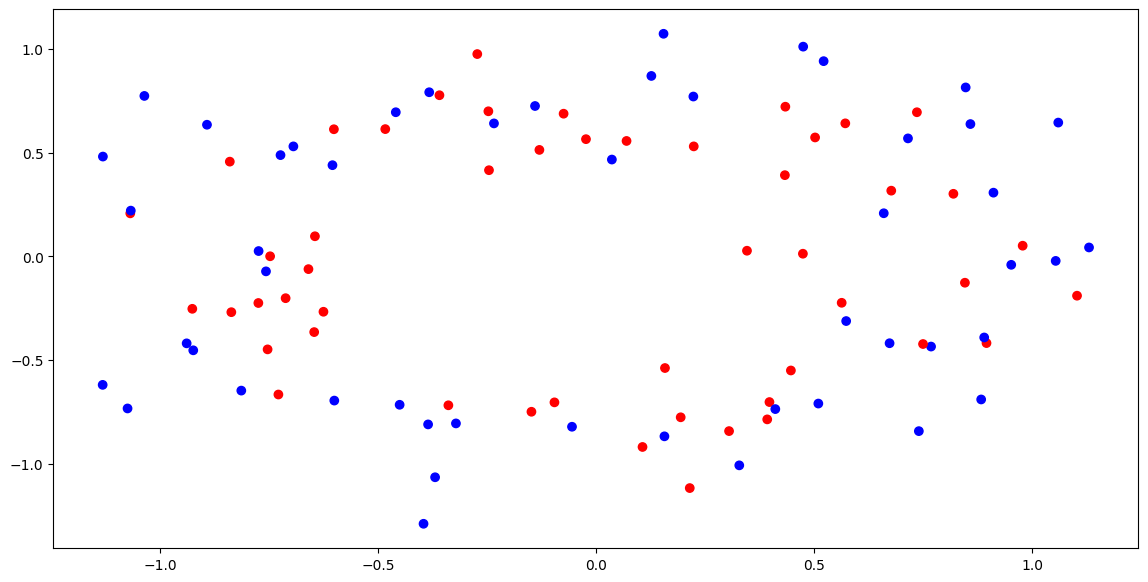

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


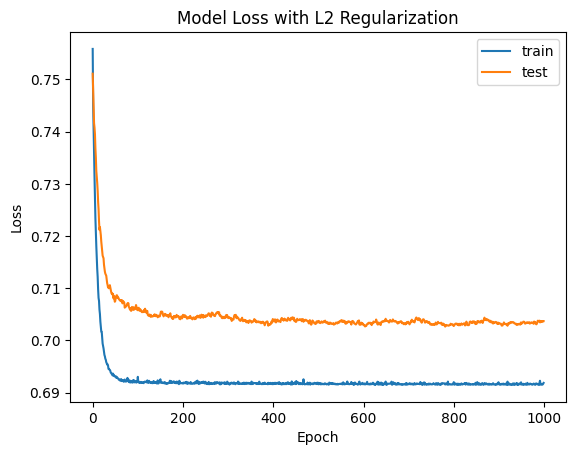

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Generate synthetic dataset
np.random.seed(800)
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# Custom color map for the plot
zero_one_colourmap = ListedColormap(('blue', 'red'))

# Plot the data
plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=zero_one_colourmap)
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Regularization imports
### L2 Regularization Model ###
l2_model = tf.keras.models.Sequential()
l2_model.add(tf.keras.layers.Dense(500, input_dim=2, activation='relu',
                                   kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
l2_model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

# Compile the model
l2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(X_test, y_test))

# Plot the loss over epochs for the L2 regularized model
plt.plot(l2_history.history['loss'], label="train")
plt.plot(l2_history.history['val_loss'], label="test")
plt.title('Model Loss with L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


l1 and l2 both

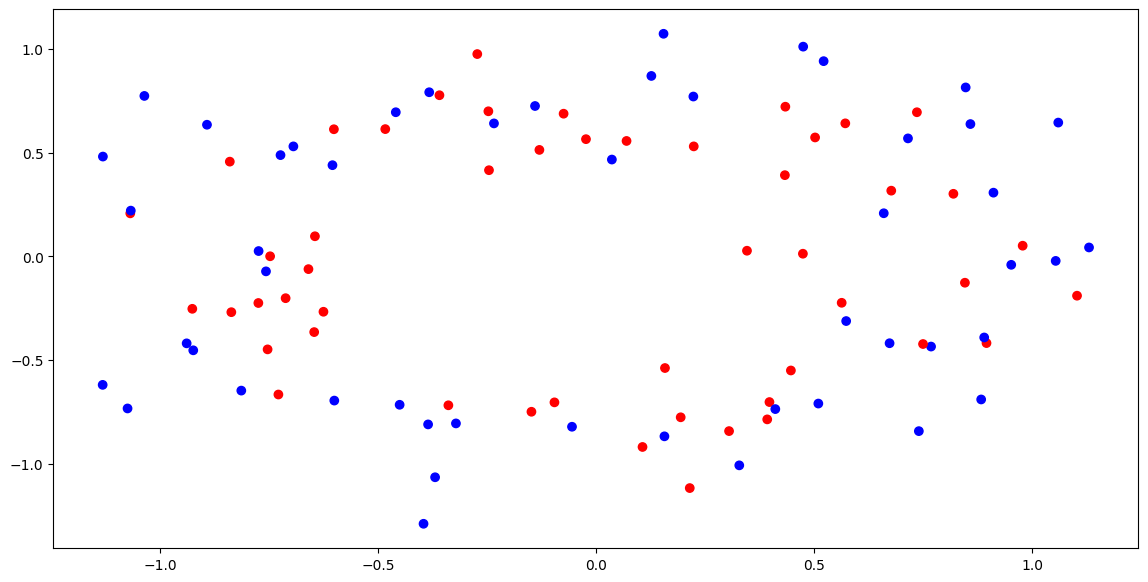

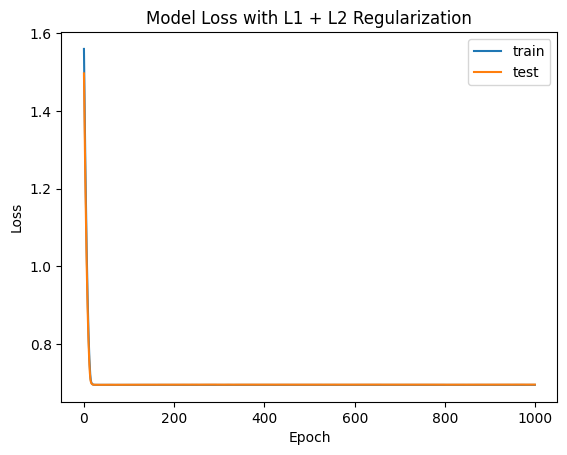

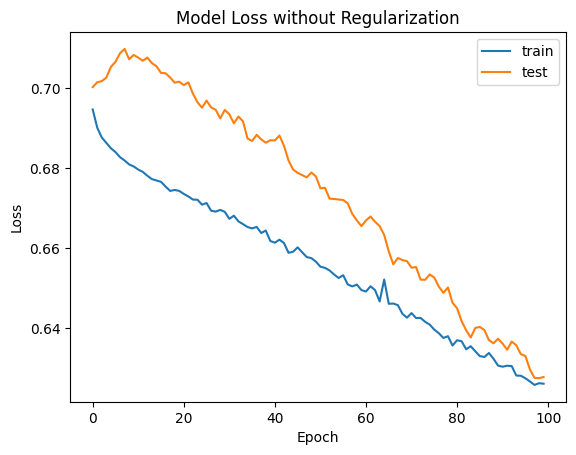

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Generate synthetic dataset
np.random.seed(800)
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# Custom color map for the plot
zero_one_colourmap = ListedColormap(('blue', 'red'))

# Plot the data
plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=zero_one_colourmap)
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Regularization imports
### Both L1 and L2 Regularization Model (Elastic Net) ###
l1_l2_model = tf.keras.models.Sequential()
l1_l2_model.add(tf.keras.layers.Dense(500, input_dim=2, activation='relu',
                                      kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))  # L1 + L2 regularization
l1_l2_model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

# Compile the model
l1_l2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
l1_l2_history = l1_l2_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(X_test, y_test))

# Plot the loss over epochs for the L1 + L2 regularized model
plt.plot(l1_l2_history.history['loss'], label="train")
plt.plot(l1_l2_history.history['val_loss'], label="test")
plt.title('Model Loss with L1 + L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Model without regularization for comparison
no_reg_model = tf.keras.models.Sequential()
no_reg_model.add(tf.keras.layers.Dense(500, input_dim=2, activation='relu'))
no_reg_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the non-regularized model
no_reg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the non-regularized model
no_reg_history = no_reg_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_data=(X_test, y_test))

# Plot the loss over epochs for the non-regularized model
plt.plot(no_reg_history.history['loss'], label="train")
plt.plot(no_reg_history.history['val_loss'], label="test")
plt.title('Model Loss without Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()